AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

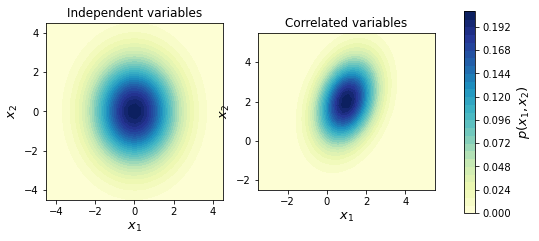

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import cm

def multivariate_normal(x,d,mean,covariance):
    x_m=x-mean
    return (1. /(np.sqrt((2*np.pi)*d*np.linalg.det(covariance))) * np.exp(-(np.linalg.solve(covariance,x_m).T.dot(x_m))/2))
def generate_surface(mean,covariance,d):
    nb_of_x=50
    x1s=np.linspace(-5,8,num=nb_of_x)
    x2s=np.linspace(-8,8,num=nb_of_x)
    x1,x2=np.meshgrid(x1s,x2s)
    pdf=np.zeros((nb_of_x,nb_of_x))
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j]=multivariate_normal(
                np.matrix([[x1[i,j]],[x2[i,j]]]),
                        d,mean,covariance)
    return x1,x2,pdf

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
d=2

bivariate_mean=np.matrix([[0.],[0.]])
bivariate_covariance=np.matrix([
    [2.,0.],
    [0.,3.]])
x1,x2,p=generate_surface(
    bivariate_mean,bivariate_covariance,d)
con=ax1.contourf(x1,x2,p,33,cmap=cm.YlGnBu)
ax1.set_xlabel('$x_1$',fontsize=13)
ax1.set_ylabel('$x_2$',fontsize=13)
ax1.axis([-4.5,4.5,-4.5,4.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)

bivariate_mean=np.matrix([[1.],[2.]])
bivariate_covariance=np.matrix([
    [1.,0.4],
    [0.4,2.]])
x1,x2,p=generate_surface(
    bivariate_mean,bivariate_covariance,d)

con=ax2.contourf(x1,x2,p,33,cmap=cm.YlGnBu)
ax2.set_xlabel('$x_1$',fontsize=13)
ax2.set_ylabel('$x_2$',fontsize=13)
ax2.axis([-3.5,5.5,-2.5,5.5])
ax2.set_aspect('equal')
ax2.set_title('Correlated variables', fontsize=12)

fig.subplots_adjust(right=0.8)
cbar_ax=fig.add_axes([0.85,0.15,0.02,0.7])
cbar=fig.colorbar(con,cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.subtitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.show()